In [1]:
from functools import partial
from pathlib import Path

import networkx as nx
import pandas as pd
from sklearn.metrics.pairwise import distance_metrics
from tabulate import tabulate

from src.clustering import get_agglomerative, get_em, get_kmeans, get_spectral
from src.compare import pairwice_rand_score
from src.num_clusters.elbow_rule import elbow_rule
from src.num_clusters.silhouette_method import silhouette_method
from src.utils import convert_distance_to_similarity
from src.experiment import experiment

In [2]:
x_path = Path('data/X_4_1.xlsx')
y_path = Path('data/Y_4_1.xlsx')

x_data = pd.read_excel(x_path, header=None)
y_data = pd.read_excel(y_path, header=None)

## Distances

- Euclidean
- Cosine


In [3]:
distance_metrics_dict = distance_metrics()

euclidean_distance_func = distance_metrics_dict['euclidean']
cosine_distance_func = distance_metrics_dict['cosine']

In [4]:
euclidean_distance_x = euclidean_distance_func(x_data)
cosine_distance_y = cosine_distance_func(y_data)

euclidean_similarity_x = convert_distance_to_similarity(euclidean_distance_x)
cosine_similarity_y = convert_distance_to_similarity(cosine_distance_y)

In [5]:
graph = nx.from_numpy_array(cosine_distance_y)

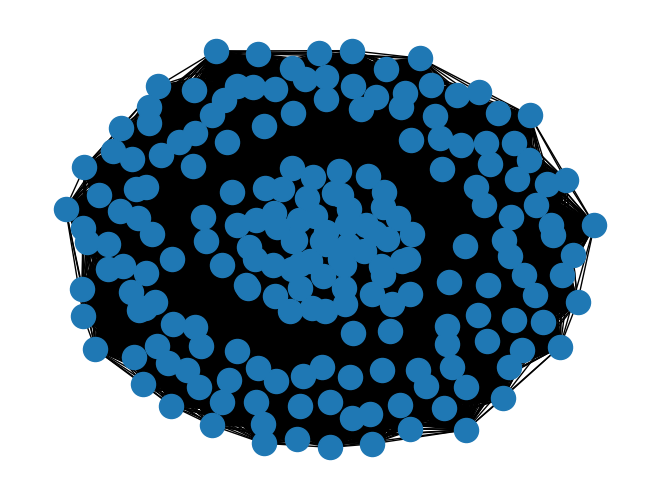

In [6]:
nx.draw(graph)

## Clustering algorithms

- AgglomerativeClustering
- K-Means
- Spectral Clustering
- Gaussian Mixture (EM)

## Experiments with data X

In [7]:
experiment(data=x_data,
           clusters_list=[2,3],
           data_name='Data X',
           linkage='single',
           agglomerative_matrix=euclidean_distance_x,
           similarity_matrix=euclidean_similarity_x)

Experiments with Data X

Num Clusters 2
+--------------------------------+----------------------------------+----------+------------+-----------------------+
|                                |   Agglomerative (single linkage) |   KMeans |   Spectral |   EM Gaussian Mixture |
|--------------------------------+----------------------------------+----------+------------+-----------------------|
| Agglomerative (single linkage) |                         1        | 0.515628 |   0.515628 |              0.519648 |
| KMeans                         |                         0.515628 | 1        |   1        |              0.980101 |
| Spectral                       |                         0.515628 | 1        |   1        |              0.980101 |
| EM Gaussian Mixture            |                         0.519648 | 0.980101 |   0.980101 |              1        |
+--------------------------------+----------------------------------+----------+------------+-----------------------+
+------------+--

## Experiments with data Y

In [8]:
experiment(data=y_data,
           clusters_list=[2,3],
           data_name='Data Y',
           linkage='complete',
           agglomerative_matrix=cosine_distance_y,
           similarity_matrix=cosine_similarity_y)

Experiments with Data Y

Num Clusters 2
+----------------------------------+------------------------------------+----------+------------+-----------------------+
|                                  |   Agglomerative (complete linkage) |   KMeans |   Spectral |   EM Gaussian Mixture |
|----------------------------------+------------------------------------+----------+------------+-----------------------|
| Agglomerative (complete linkage) |                           1        | 1        |   1        |              0.608492 |
| KMeans                           |                           1        | 1        |   1        |              0.608492 |
| Spectral                         |                           1        | 1        |   1        |              0.608492 |
| EM Gaussian Mixture              |                           0.608492 | 0.608492 |   0.608492 |              1        |
+----------------------------------+------------------------------------+----------+------------+---------

## Number of clusters

- The elbow rule
- The Silhouette Method

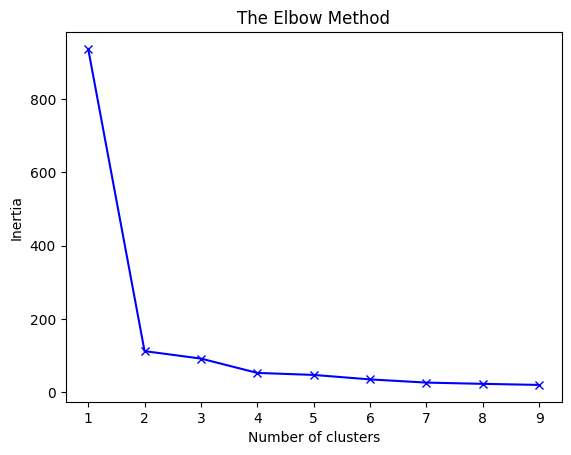

In [9]:
elbow_rule(cosine_distance_y, 10)
pass

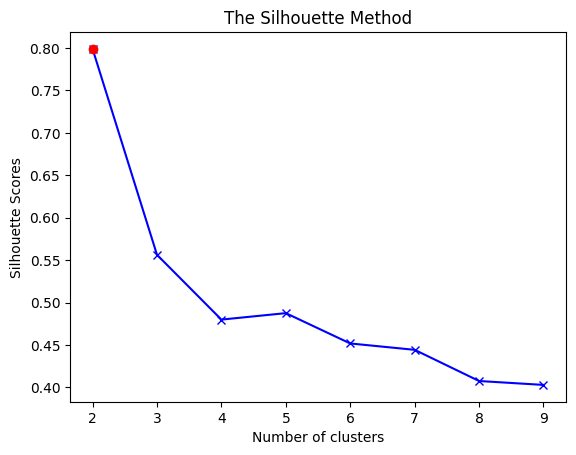

In [10]:
silhouette_method(cosine_distance_y, 10)
pass